In this project we'll perform Decision Tree Classification on a famous Titanic Dataset.
Let's get aboard and see why good and healthy lifestyle could tip the scales towards favourable outcome (ofc...unless someone's having suicidal thoughts) in life-death situations.

In [30]:
#import all the important libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
#load in the data
#We've to perform split on the data.
df = pd.read_excel("titanic.xlsx")
#Replace all the NaN with 0.
df = df.fillna(0)
train, test = train_test_split(df, test_size = 0.2)


Remember: I've replaced 0 -> Female and 1 -> male

In [32]:
train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1255,3,0,"Toufik, Mr. Nakli",1,0.0,0,0,2641,7.2292,0,C,0,0.0,0
843,3,0,"Hagland, Mr. Konrad Mathias Reiersen",1,0.0,1,0,65304,19.9667,0,S,0,0.0,0
81,1,0,"Crosby, Capt. Edward Gifford",1,70.0,1,1,WE/P 5735,71.0000,B22,S,0,269.0,"Milwaukee, WI"
986,3,0,"Maenpaa, Mr. Matti Alexanteri",1,22.0,0,0,STON/O 2. 3101275,7.1250,0,S,0,0.0,0
751,3,0,"Dantcheff, Mr. Ristiu",1,25.0,0,0,349203,7.8958,0,S,0,0.0,"Bulgaria Chicago, IL"


In [33]:
test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1056,3,1,"Nicola-Yarred, Master. Elias",1,12.0,1,0,2651,11.2417,0,C,C,0.0,0
158,1,0,"Hipkins, Mr. William Edward",1,55.0,0,0,680,50.0000,C39,S,0,0.0,London / Birmingham
163,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",0,35.0,1,0,113789,52.0000,0,S,8,0.0,"New York, NY"
768,3,0,"Denkoff, Mr. Mitto",1,0.0,0,0,349225,7.8958,0,S,0,0.0,"Bulgaria Coon Rapids, IA"
413,2,0,"Gale, Mr. Harry",1,38.0,1,0,28664,21.0000,0,S,0,0.0,"Cornwall / Clear Creek, CO"


In [34]:
#data ka shape dekh liya jaae
print("Training Data Shape:", train.shape)
#data ka shape dekh liya jaae
print("Testing Data Shape:", test.shape)

Training Data Shape: (1047, 14)
Testing Data Shape: (262, 14)


In [35]:
#Separation of independent and target variable on training data.
train_x = train.drop(columns=["survived", "name", "home.dest", "cabin", "embarked", "ticket", "boat", "body"], axis=1)
train_y = train["survived"]
#Separation of independent and target variable on testing data.
test_x = test.drop(columns=["survived", "name", "home.dest", "cabin", "embarked", "ticket", "boat", "body"], axis=1)
test_y = test["survived"]

In [36]:
train_x.head()

,pclass,sex,age,sibsp,parch,fare
1255,3,1,0.0,0,0,7.2292
843,3,1,0.0,1,0,19.9667
81,1,1,70.0,1,1,71.0000
986,3,1,22.0,0,0,7.1250
751,3,1,25.0,0,0,7.8958


In [37]:
#fit the model -> basically ek object initialise kar rhe h abhi yahaa
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [38]:
#Let's get depth of our tree
print("Depth of our tree: ", model.get_depth())

Depth of our tree:  20


In [39]:
#Prediction of target on train dataset
predict_train = model.predict(train_x)
print("Target on train data", predict_train)

Target on train data [0 0 0 ... 1 0 1]


In [40]:
#Accuracy Score on train dataset
acc_train = accuracy_score(train_y, predict_train)
print("Accuracy Score on Train Dataset: ", acc_train)

Accuracy Score on Train Dataset:  0.9742120343839542


In [41]:
#Prediction of target on test dataset
predict_test = model.predict(test_x)
print("Target on test data: ", predict_test)

Target on test data:  [0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 0 0 0]


In [42]:
#Accuracy Score on test datatset
acc_test = accuracy_score(test_y, predict_test)
print("Accuracy Score on Test Dataset: ", acc_test)

Accuracy Score on Test Dataset:  0.7633587786259542


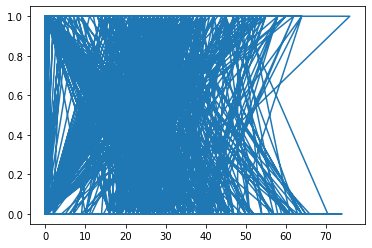

In [43]:
import matplotlib.pyplot as plt
plt.plot(train_x["age"], train_y)